Time to talk Bessel!

First, let's set up our basic environment

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma
%matplotlib inline

Now, let's define the solutions to Bessel's equation. We have (12.9)

$J_p(x) = \sum_{n=0}^\infty \frac{(-1)^n}{\Gamma(n+1)\Gamma(n+1+p)} \left(\frac{x}{2} \right)^{2n+p}$

And we'll do our normal thing, whwere we make up a bunch of points upon which to calculate our function, then start with zero and add terms.

First, a bit of programming syntax, `+=`

In [2]:
thing = 2
thing = thing + 2
print(thing)

4


In [3]:
thingything = 6
thingything += 2 # += means thing = thing + 2.
print(thingything)

8


Now, let's define a function to calculate bessel functions, just exactly implementing the mathematical definition above

In [4]:
def Jp(p,x,N):
    result = 0
    for n in range(0,N+1):
        #result = result + new stuff, for term n
        result += ((x/2)**(2*n+p)) * ((-1)**n)/(gamma(n+1)*gamma(n+1+p))
    return result

In [5]:
Jp(4,3,4)

0.1320406436920166

Cool. That gives us back the value at one point. Using numpy arrays, we can get a range of values, so that we can plot them.

In [6]:
def Jp(p,x,N):
    result = np.zeros_like(x)
    for n in range(0,N+1):
        #result = result + new stuff, for term n
        result += ((x/2)**(2*n+p)) * ((-1)**n)/(gamma(n+1)*gamma(n+1+p))
    return result

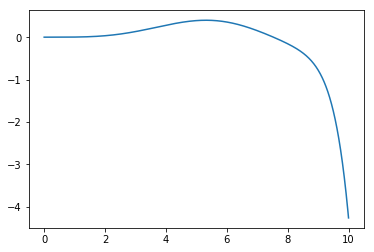

In [7]:
x = np.linspace(0,10,1000)
plt.plot(x,Jp(4,x,7))

## Make it interactive

Here's one of the things that's just amazingly useful about Jupyter notebooks. I'd like to interact with teh above thing.

In [8]:
from ipywidgets import interact, fixed

In [9]:
def plotJ(p,N):
    x = np.linspace(0,10,1000)
    plt.plot(x,Jp(p,x,N))

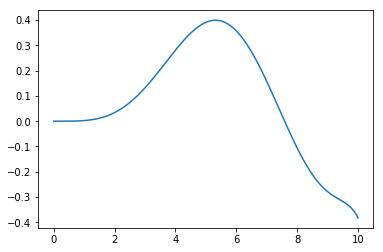

In [10]:
plotJ(4,9)

In [11]:
interact(plotJ,p=(-5,5),N=(0,30))

interactive(children=(IntSlider(value=0, description='p', max=5, min=-5), IntSlider(value=15, description='N', max=30), Output()), _dom_classes=('widget-interact',))

<function __main__.plotJ>

Oh, now I'd like to mess around with the x axis, so I can see what happens farther out.

In [12]:
def plotJ(p=4,N=10,xmax=10):
    x = np.linspace(0,xmax,1000)
    plt.plot(x,Jp(p,x,N))
interact(plotJ,p=(-5,5),N=(0,300,10),xmax=(10,100,10))

interactive(children=(IntSlider(value=4, description='p', max=5, min=-5), IntSlider(value=10, description='N', max=300, step=10), IntSlider(value=10, description='xmax', min=10, step=10), Output()), _dom_classes=('widget-interact',))

<function __main__.plotJ>

We learned a few interesting lessons from the above, especially about numerical issues. Among them

 ** Adding more terms doesn't always help. It sometimes leads to numerical instability **
 
We also noticed that sometimes the `xmax` parameter didn't work. Here's an example, where we should be going from 0 to 60, but it looks like we only go from 0 to about 37:

/Users/mglerner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/Users/mglerner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/Users/mglerner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


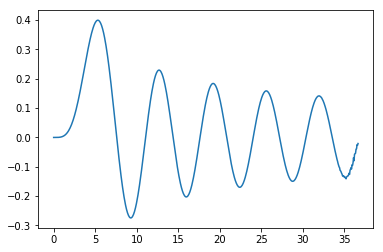

In [13]:
xmax=60
x = np.linspace(0,xmax,1000)
jpx = Jp(p=4,x=x,N=120)
plt.plot(x,jpx)

Our first hint is that we're getting a bunch of errors about division. Let's look at the data, but maybe with only 100 data points:

/Users/mglerner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/Users/mglerner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/Users/mglerner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


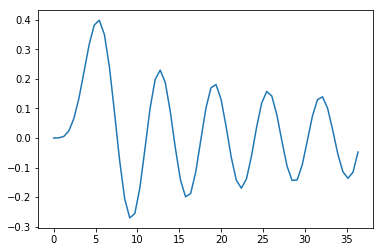

In [14]:
xmax=60
x = np.linspace(0,xmax,100)
jpx = Jp(p=4,x=x,N=120)
plt.plot(x,jpx)

In [15]:
jpx

array([  0.00000000e+00,   3.44940926e-04,   5.22096514e-03,
         2.40664819e-02,   6.65339297e-02,   1.36091528e-01,
         2.25423608e-01,   3.15873664e-01,   3.81693429e-01,
         3.98003178e-01,   3.49821676e-01,   2.38882378e-01,
         8.54950626e-02,  -7.57050339e-02,  -2.05182063e-01,
        -2.70280032e-01,  -2.55555322e-01,  -1.68150334e-01,
        -3.62132591e-02,   9.93759986e-02,   1.97473860e-01,
         2.29377965e-01,   1.87652029e-01,   8.81710309e-02,
        -3.53081757e-02,  -1.42285297e-01,  -1.98709142e-01,
        -1.87891328e-01,  -1.15575286e-01,  -7.55204470e-03,
         9.92967049e-02,   1.69466108e-01,   1.80603699e-01,
         1.30670932e-01,   3.81659697e-02,  -6.45526287e-02,
        -1.42476958e-01,  -1.69834237e-01,  -1.38612833e-01,
        -6.08985220e-02,   3.56636831e-02,   1.17618257e-01,
         1.57240135e-01,   1.41902413e-01,   7.80938930e-02,
        -1.11800516e-02,  -9.46328157e-02,  -1.43609323e-01,
        -1.41907450e-01,

All of those "`nan`"s at the end are what happened when we tried to divide by zero. By default, those get ignored during plotting. Here, ignoring them means stopping the plot early. Cool.